In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pickle

with open('../src/outputs/1-5_examples_VLM_qwen.pkl','rb') as f:
    outputs = pickle.load(f)

for output in outputs:
    output['image_path'] = "../" + output['image_path']

In [2]:
import pickle
from tabulate import tabulate

with open('../src/outputs/caire_examples_WIKI.pkl', 'rb') as f:
    wiki = pickle.load(f)

labels = ['Green-headed Tanager', 'Jaguar', 'Feijoada', 'Jama Masjid', 'Jabuticaba']

# Extract matched Wikipedia titles
matched = [[entry['title'] for entry in group] for group in wiki]
table_data = [[label] + matches for label, matches in zip(labels, matched)]
print(tabulate(table_data, headers=["Label", "Match 1", "Match 2", "Match 3"], tablefmt="grid"))

+----------------------+---------------------------+------------------------+--------------------------+
| Label                | Match 1                   | Match 2                | Match 3                  |
+======================+===========================+========================+==========================+
| Green-headed Tanager | Tangara_(genus)           | Green-headed_tanager   | Paradise_tanager         |
+----------------------+---------------------------+------------------------+--------------------------+
| Jaguar               | South_American_jaguar     | jaguar                 | Jaguar_Conservation_Fund |
+----------------------+---------------------------+------------------------+--------------------------+
| Feijoada             | Feijoada (Brazilian dish) | feijoada               | Brazilian cuisine        |
+----------------------+---------------------------+------------------------+--------------------------+
| Jama Masjid          | Jama_Masjid,_Delhi        | Ja

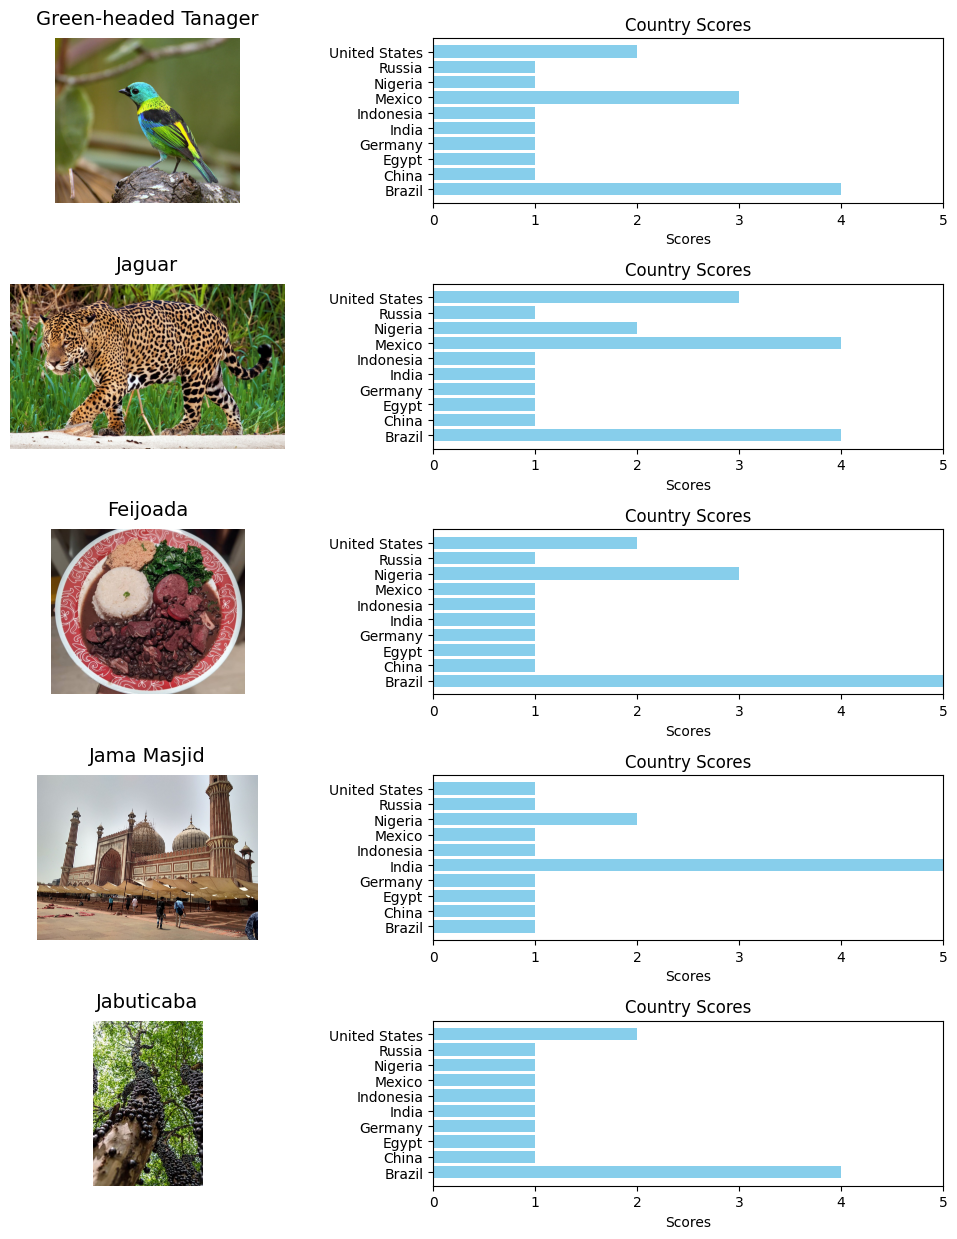

In [ ]:
fig, axes = plt.subplots(len(outputs), 2, figsize=(10, 2.5 * len(outputs)), gridspec_kw={'width_ratios': [1, 1.5]})

for i, (output, label) in enumerate(zip(outputs, labels)):
    image_path = output['image_path']
    scores = {key: int(round(value)) for key, value in output['values'].items()} 

    countries = list(scores.keys())
    values = list(scores.values())

    img = Image.open(image_path)
    axes[i, 0].imshow(img)
    axes[i, 0].axis("off")
    axes[i, 0].set_title(label, fontsize=14, pad=10)

    y_pos = np.arange(len(countries))
    axes[i, 1].barh(y_pos, values, color='skyblue')
    axes[i, 1].set_yticks(y_pos)
    axes[i, 1].set_yticklabels(countries)
    axes[i, 1].set_xlabel("Scores")
    axes[i, 1].set_title("Country Scores")

    axes[i, 1].set_xlim(0, 5)
    axes[i, 1].set_xticks(np.arange(0, 6, 1))

plt.tight_layout()
plt.show()
